In [3]:
# preps: ispis bez print funkcije :-)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re  # regex
from pprint import pprint # pretty print

# RacJez | Python | Regex II

## Promjene stringova

Koristeći regex izraze i pripadne funkcije raditi promjene nad stringovima:
* razdvajanje (`split()`)
* zamjena (`sub,subn()`)

Dodatne funkcionalnosti:
* grupe dohvaćanja
* povratnost
* imenovanje grupa

**Napomena**: Svi primjeri koji će biti predstavljeni mogu se prekompilirati radi efikasnosti. 

## Python | Regex | split

```python
re.split(pattern,string,maxsplit=0,flags=0)
```

* funkcija koja razdvaja `string` prema pojavi podudaranja s `pattern`
* opcija `maxsplit` kaže koliko najviše želimo podjela
* ukoliko koristimo regex grupe dohvaćanja `()`, tekst te grupe se isto pojavljuje u podjeli.

In [2]:
# Python | Regex | split
# tekst
verse1 = "Bolestan bijah i u tamnici i ne pohodiste me! Gospodine, a kada te to vidjesmo? A ovi u muku odoše."

# razdvajanje v1
re.split('\.|!|\?',verse1)
# ukoliko zelimo imati uzorak u podijeli enkapsuliramo čitav izraz u grupu
re.split('(\.|!|\?)',verse1)

verse2 = "Pohvatajte lisice male lisice što oštećuju vinograde"
re.split('\W+',verse2,1)
re.split('(\W+)',verse2,1)



['Bolestan bijah i u tamnici i ne pohodiste me',
 ' Gospodine, a kada te to vidjesmo',
 ' A ovi u muku odoše',
 '']

['Bolestan bijah i u tamnici i ne pohodiste me',
 '!',
 ' Gospodine, a kada te to vidjesmo',
 '?',
 ' A ovi u muku odoše',
 '.',
 '']

['Pohvatajte', 'lisice male lisice što oštećuju vinograde']

['Pohvatajte', ' ', 'lisice male lisice što oštećuju vinograde']

## Python | Regex | sub, subn

 ```python
re.sub(pattern,repl,string,count=0,flags=0)
```

* vrati string vraćen zamjenom prve (s lijeva na desno) nepreklapajuće podudarajuće pojave uzorka `pattern` u `string` s parametrom `repl` 
* ukoliko uzorak nije nađen vrati nepromijenjen string
* parametar `repl` može biti string ili _funkcija_ 
* opcionalni parametar `count` predstavlja max. broj zamjena


```python
re.subn(pattern,repl,string,count=0,flags=0)
```
* ista funkcionalnost kao `sub()` osim što vraća dvojku izmjenjenog stringa i broj učinjenih zamjena 

In [3]:
# Python | regex | sub
# zamjeni 1,2,3 sa znakom '&'
verse3 = "Marko1 Matej2 Luka3 Ivan"
re.sub('[0-9]+ ',' & ',verse3)

# nepreklapajuce podudaranje s lijeva
verse4 = "Bond000007"
re.sub('000','',verse4)
# repl kao funkcija?
# normal(): zamjeni znak `-` sa slovom 'A', a sva slova sa slovom 'B'
def normal(matchObj):
    pprint(matchObj.groups()) # ispis podudaranja
    if matchObj.group(1)=='-': return 'A'
    else: return 'B'

tekst = '-1234 A193 B123 B124'
re.sub('([-|A-Z])',normal,tekst)

# 'subn()' primjer
verse3 = "Marko1 Matej2 Luka3 Ivan"
re.subn('[0-9]+ ',' & ',verse3)


'Marko & Matej & Luka & Ivan'

'Bond007'

('-',)
('A',)
('B',)
('B',)


'A1234 B193 B123 B124'

('Marko & Matej & Luka & Ivan', 3)

## Python | regex | grupe dohvaćanja

Grupe dohvaćanja unutar regex uzorka, u oznaci `()`, služe kasnijem dohvaćanju preko:
* `group(num=x)` metode iz objekta sparivanja `matchObj` gdje je `x` redni broj grupe
* povratno referenciranje ili isključivanje iz dohvaćanja
* mogu biti imenovane 


In [4]:
# regex | grupe dohvaćanja
import re
# Razlika uzoraka do na zagrade?
# 1. standardno podudaranje uzoraka bez grupa
tekst = "Srpanj 24, Kolovoz 9, Prosinac 12, Travanj D"
regex = r"[a-zA-Z]+ \d+"
matches = re.findall(regex, tekst)
print(matches)
# 2. dohvaćanje posebnog dijela podudarenog uzorka
regex = r"([a-zA-Z]+) \d+"
matches = re.findall(regex, tekst)
print(matches)

# search
matchObj = re.search(r'([a-zA-Z]+) (\d+)',tekst)
matchObj.group()   # dohvaćanje bez grupe
matchObj.group(1) # dohvacanje 1. grupe 
matchObj.group(2) # dohvacanje 2. grupe

['Srpanj 24', 'Kolovoz 9', 'Prosinac 12']
['Srpanj', 'Kolovoz', 'Prosinac']


'Srpanj 24'

'Srpanj'

'24'

### Python | regex | povratnost (engl. backreference)

U funkciji zamjene `sub` od koristi je ponekad koristiti *povratnost*: 
* korištenje reference na prijašnju grupu iz regex uzorka  
* oznaka: `\i` gdje  `i` redni broj grupe u `pattern` ukoliko se dohvaća unutar uzorka, inače `\g<i>`

In [5]:
# primjer 1: povratnost
test = 'Python&Pails'
pattern = r'([Pp])ython&\1ails'
re.match(pattern,test).group()

# primjer 2: MarkDown 2 HTML konverzija
tekst = 'zamislite bolju *Hrvatsku*, *čarobnu* Hrvatsku'
pattern = r'\*(.*?)\*' # nepohlepni pristup pronalazenja *izraz*
# \g<1> predstavlja referencu na 1. grupu: (.*?)
re.sub(pattern,r'<b>\g<1></b>',tekst,count=1) # count predstavlja broj ostvarenih zamjena





'Python&Pails'

'zamislite bolju <b>Hrvatsku</b>, *čarobnu* Hrvatsku'


### izuzimajuće grupe dohvaćanja

Grupe dohvaćanja možemo eksplicitno izuzeti u oznaci
```python
(?:pattern)
```
što znači: 
* potraga pronalazi `pattern` unutar stringa, ali ne vraća podudarajući podstring za tu grupu
* grupa se ne može referencirati

In [113]:
# dohvacanje preko findall 
tekst = 'abbaabbba'
re.findall(r'(a((a+)|(b+)))',tekst) # ukupno 3 grupe dohvaćanja

# isključivanje grupe:
# primjer 1
re.findall(r'(a((?:a+)|(?:b+)))',tekst) # ukupno jedna grupa dohvaćanja
# primjer 2
re.findall(r'(a(a+))',tekst) 
re.findall(r'a(?:a+)',tekst) 


[('abb', 'bb', '', 'bb'), ('aa', 'a', 'a', '')]

[('abb', 'bb'), ('aa', 'a')]

[('aa', 'a')]

['aa']

##  imenovanje grupa
* grupe dohvaćanja mogu se imenovati s oznakom `(?P<name>)` gdje `name` predstavlja ime te grupe
* grupa se dohvaća s `(?P=name)` i predstavlja novu grupu s uzorkom grupe `name`

In [6]:
#imenovane grupe
import re

tekst = 'Ovo je neki tekst !?. sa znakovima interpunkcije.'

for pattern in [ r'^(?P<prva_rijec>\w+)',
                   r'(?P<zadnja_rijec>\w+)\S*$',
                   r'(?P<t_rijec>\bt\w+)\W+(?P<neka_rijec>\w+)',
                  r'(?P<zavrsava_t>\w+t)\b'
                ]:
    
    match = re.search(pattern,tekst)
    print('\nregex: "%s": '.rjust(10) % pattern)
    print('\tgrupe:\t\t '.rjust(10),  match.groups())
    print('\trjecnici imena:\t '.rjust(8),  match.groupdict())



regex: "^(?P<prva_rijec>\w+)": 
	grupe:		  ('Ovo',)
	rjecnici imena:	  {'prva_rijec': 'Ovo'}

regex: "(?P<zadnja_rijec>\w+)\S*$": 
	grupe:		  ('interpunkcije',)
	rjecnici imena:	  {'zadnja_rijec': 'interpunkcije'}

regex: "(?P<t_rijec>\bt\w+)\W+(?P<neka_rijec>\w+)": 
	grupe:		  ('tekst', 'sa')
	rjecnici imena:	  {'t_rijec': 'tekst', 'neka_rijec': 'sa'}

regex: "(?P<zavrsava_t>\w+t)\b": 
	grupe:		  ('tekst',)
	rjecnici imena:	  {'zavrsava_t': 'tekst'}


# Vježba: Markdown2HTML 

Predložite još neke regex izraze koji će napraviti konverziju `**` znakova u odgovarajući `<b>`,`</b>`



In [8]:
#substitute
print('\n** ZAMJENE **')
bold = re.compile(r'\*{2}(.*?)\*{2}')
tekst = 'Načini ovo **podebljano**. Ovo **takodjer**.'

print('Tekst:', tekst)
print('podebljano:', bold.sub(r'<b>\1</b>', tekst))

#substitute named group
print('\n** ZAMJENE IMENOVANE GRUPE **')
masno = re.compile(r'\*{2}(?P<Podebljani_tekst>.*?)\*{2}', re.UNICODE)
tekst = 'Načini ovo **podebljano**. Ovo **takodjer**.'

print('Tekst:', tekst)
print('podebljano:', masno.sub(r'<b>\g<Podebljani_tekst></b>', tekst))


#substitute count
print('\n** PREBROJAVANJE ZAMJENA **')
masno = re.compile(r'\*{2}(.*?)\*{2}', re.UNICODE)
tekst = 'Načini ovo **podebljano**. Ovo **takodjer**.'

print('Tekst:', tekst)
print('podebljano:', masno.sub(r'<b>\1</b>', tekst, count=1))




** ZAMJENE **
Tekst: Načini ovo **podebljano**. Ovo **takodjer**.
podebljano: Načini ovo <b>podebljano</b>. Ovo <b>takodjer</b>.

** ZAMJENE IMENOVANE GRUPE **
Tekst: Načini ovo **podebljano**. Ovo **takodjer**.
podebljano: Načini ovo <b>podebljano</b>. Ovo <b>takodjer</b>.

** PREBROJAVANJE ZAMJENA **
Tekst: Načini ovo **podebljano**. Ovo **takodjer**.
podebljano: Načini ovo <b>podebljano</b>. Ovo **takodjer**.


# ZADATAK: Validne email adrese

Za dani tekst `emails` napišite Python program koji će iz `emails` ispisati validna imena email adresa. Problem riješite tako da koristite regex.

In [9]:
# gotova implementacija

emails = """ime.prezime@abcd.edu;
ime.prezime+category@gmail.com;
ispravna@adresa@mail.primjer.com;
pitagora.mathos.hr"""


# rjesenje 

regex = '^\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+$'

for e in emails.splitlines():
    email = e.rstrip(';')
    print(email,':',end=' ')
    if re.search(regex,email): 
        print("OK")  
    else:  
        print("Not OK")  


ime.prezime@abcd.edu : OK
ime.prezime+category@gmail.com : Not OK
ispravna@adresa@mail.primjer.com : Not OK
pitagora.mathos.hr : Not OK


# Morfološka analiza sa FST

In [ ]:
!pip install pyfoma 
# winget install graphviz

In [ ]:
import os
os.environ['PATH'] += r';C:\Program Files\Graphviz\bin'

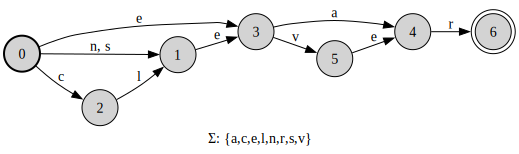

In [9]:
# regularni izraz u foma
from pyfoma import FST
myfst = FST.re("(cl|n|s)?e(ve|a)r")
myfst.view()

Definicija leksičkog transduktora s posrednom razninom.

In [ ]:
from pyfoma import FST

Grammar = {}
Grammar["S"] = [("", "Noun"), ("", "Verb")] # S -> ϵ Noun|ϵ Verb
Grammar["Noun"] = [("cat", "NInfl"), ("city", "NInfl"), ("box", "NInfl"), \
                   ("panic", "NInfl"),("try", "NInfl"),("watch", "NInfl")]

Grammar["Verb"] = [("beg", "VInfl"), ("box", "VInfl"), ("fake", "VInfl"), \
                   ("panic", "VInfl"),("try", "VInfl"),("watch", "VInfl")]

Grammar["NInfl"] = [(("'[N]''[Sg]'", ""), "#"), (("'[N]''[Pl]'", "+s"), "#")]

Grammar["VInfl"] = [(("'[V]'", ""), "#"), (("'[V]''[3P]''[Sg]'", "+s"), "#"), \
                    (("'[V]''[Past]'", "+ed"), "#"), (("'[V]''[Past]''[Part]'", "+ed"), "#"), \
                    (("'[V]''[Pres]''[Part]'", "+ing"), "#")]

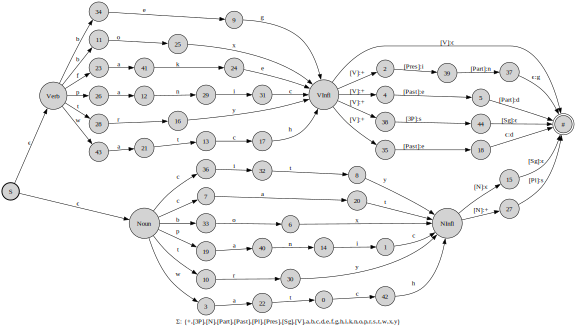

In [20]:
Lexicon = FST.rlg(Grammar, "S")
Lexicon.view()

In [21]:
from pyfoma import Paradigm
print(Paradigm(Lexicon, "try.*"))

try  [N][Pl]          try+s    
try  [N][Sg]          try      
try  [V]              try      
try  [V][3P][Sg]      try+s    
try  [V][Past]        try+ed   
try  [V][Past][Part]  try+ed   
try  [V][Pres][Part]  try+ing  



In [22]:

print(Paradigm(Lexicon, ".*"))

beg    [V]              beg        
beg    [V][3P][Sg]      beg+s      
beg    [V][Past]        beg+ed     
beg    [V][Past][Part]  beg+ed     
beg    [V][Pres][Part]  beg+ing    
box    [N][Pl]          box+s      
box    [N][Sg]          box        
box    [V]              box        
box    [V][3P][Sg]      box+s      
box    [V][Past]        box+ed     
box    [V][Past][Part]  box+ed     
box    [V][Pres][Part]  box+ing    
cat    [N][Pl]          cat+s      
cat    [N][Sg]          cat        
city   [N][Pl]          city+s     
city   [N][Sg]          city       
fake   [V]              fake       
fake   [V][3P][Sg]      fake+s     
fake   [V][Past]        fake+ed    
fake   [V][Past][Part]  fake+ed    
fake   [V][Pres][Part]  fake+ing   
panic  [N][Pl]          panic+s    
panic  [N][Sg]          panic      
panic  [V]              panic      
panic  [V][3P][Sg]      panic+s    
panic  [V][Past]        panic+ed   
panic  [V][Past][Part]  panic+ed   
panic  [V][Pres][Part]  pani

In [ ]:
# pravilo: e-insertion prije s, z, x, ch, sh pri dodavanju +s
fsts = {} # Empty dictionary for rules
fsts['einsert'] = FST.re(r"$^rewrite('':e / (s|z|x|ch|sh) \+ _ s)")
list(fsts['einsert'].generate("watch+s"))

['watch+es']

In [30]:
# pravilo: e-deletion kod dodavanja +ed
fsts['edelete'] = FST.re(r"$^rewrite(e:'' / _ \+ [ei])")
list(fsts['edelete'].generate("fake+ing"))

['fak+ing']

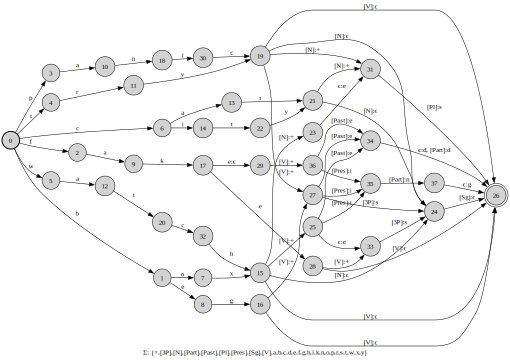

In [31]:
# konačni parser
fsts['Lexicon'] = Lexicon  # Add lexicon to the dictionary so the compiler can find $Lexicon
English = FST.re("$Lexicon @ $edelete @ $einsert", fsts)
English.view()

In [45]:
# generator
list(English.generate("watch[N][Pl]"))

['watches']

In [ ]:
# parser
list(English.analyze("watches"))

['watch[N][Pl]', 'watch[V][3P][Sg]']

Primjer sa više morfoloških pravila.

In [46]:
# kompletan primjer
from pyfoma import FST


Grammar = {}
Grammar["S"] = [("", "Noun"), ("", "Verb")] # S -> ϵ Noun|ϵ Verb
Grammar["Noun"] = [("cat", "NInfl"), ("city", "NInfl"), ("box", "NInfl"), \
                   ("panic", "NInfl"),("try", "NInfl"),("watch", "NInfl")]

Grammar["Verb"] = [("beg", "VInfl"), ("box", "VInfl"), ("fake", "VInfl"), \
                   ("panic", "VInfl"),("try", "VInfl"),("watch", "VInfl")]

Grammar["NInfl"] = [(("'[N]''[Sg]'", ""), "#"), (("'[N]''[Pl]'", "+s"), "#")]

Grammar["VInfl"] = [(("'[V]'", ""), "#"), (("'[V]''[3P]''[Sg]'", "+s"), "#"), \
                    (("'[V]''[Past]'", "+ed"), "#"), (("'[V]''[Past]''[Part]'", "+ed"), "#"), \
                    (("'[V]''[Pres]''[Part]'", "+ing"), "#")]

fsts = {} # Store all transducers in this dictionary

fsts['Lexicon'] = FST.rlg(Grammar, "S").epsilon_remove().determinize().minimize()

# Definitions
fsts['V'] = FST.re("[aeiou]")         # Vowels
fsts['C'] = FST.re("[a-z] - [aeiou]") # Consonants

# Rewrite Rules
fsts['edelete'] = FST.re(r"$^rewrite(e:'' / _ \+ [ei])") # make+ing > mak+ing
fsts['yreplace'] = FST.re(r"$^rewrite(y:(ie) / _ \+ s) @ $^rewrite(y:i / _ \+ ed)") # try+s > trie+s
fsts['einsert'] = FST.re(r"$^rewrite('':e / (s|z|x|ch|sh) \+ _ s)")   # watch+s > watch+es
fsts['kinsert'] = FST.re(r"$^rewrite('':k / $C $V c _ \+ $V)", fsts)  # panic+ing > panick+ing
fsts['geminate'] = FST.re(r"$^rewrite(g:(gg) / $C $V _ \+ $V)", fsts) # beg+ing > begg+ing
fsts['cleanup'] = FST.re(r"$^rewrite(\+:'')")                         # begg+ing > begging
English = FST.re(r"$Lexicon @ $edelete @ $einsert @ $yreplace @ $kinsert @ $geminate @ $cleanup", fsts)

In [47]:
list(English.generate("panic[V][Past][Part]"))

['panicked']